In [ ]:
#Created on 14 June 2022
#Last Modified on 19 July 2022
#FYP for Mr. Tian Kai Wen TP051580
#Computer Science (Intelligent system)
#Asia Pacific University
#Data balance

#The code here is to process the dataset as the dataset used is the sample dataset of Deepfake detection challenge(DFDC) which is not the entire dataset.
#There is great imbalance between REAL and FAKE data. There is more Fake data than Real data. Thus, data is balanced by adding more REAL video from DFDC part 49.
#New json file would be created by adding the previous training and the new REAL data.

In [ ]:
#Import libraries
import pandas as pd
import json
import glob
import shutil
from google.colab import drive

In [ ]:
#To save file as json
def saveFile(data,dir):
  with open(dir,'w') as f:
    f.write(json.dumps(data,separators=(',',':')))

#To load the json file
def loadFile(dir):
  with open(dir,'r') as f:
    data=json.load(f)
  return data

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


FAKE    2619
REAL     515
Name: label, dtype: int64

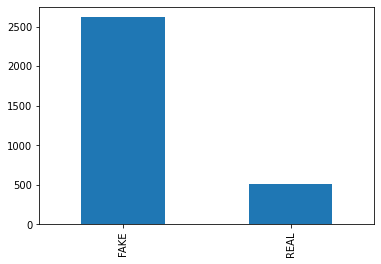

In [ ]:
dfTrain = pd.read_json('/content/meta/metadata49.json').transpose()
dfTrain.head()
dfTrain.label.value_counts().plot.bar()
dfTrain.label.value_counts()


FAKE    323
REAL     77
Name: label, dtype: int64

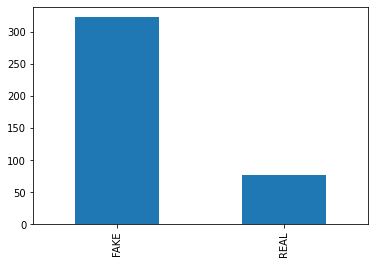

In [ ]:
dfTrain2 = pd.read_json('/content/meta/metadatasample.json').transpose()
dfTrain2.head()
dfTrain2.label.value_counts().plot.bar()
dfTrain2.label.value_counts()

In [ ]:
#To load the json49 file
json49File=open('/content/meta/metadata49.json')
json49Data=json49File.read()
json49=json.loads(json49Data)

#To load the jsonSample file
jsonSampleFile=open('/content/meta/metadatasample.json')
jsonSampleData=jsonSampleFile.read()
jsonSample=json.loads(jsonSampleData)

#To extract all the Real video from json49
listRealJson49=[]
for j in json49:
  if(json49[j]['label']=='REAL'):
    listRealJson49.append(j)

#To extract all the Real video from jsonSample
listRealJsonSample=[]
for j in jsonSample:
  if(jsonSample[j]['label']=='REAL'):
    listRealJsonSample.append(j)  



#Extract 246 video of json59 that is not existed in jsonsample and store them into filterDict.
#! mkdir ~/.filtereddata 
counter=0
filterDict=dict()
for x in listRealJson49:
  if(counter >=246):
    break
  flag=0
  for y in listRealJsonSample:
    if(x==y):
      flag=1
      break
  if(flag==0):
    filterDict[x] =json49[x]
    counter=counter+1


print(len(filterDict))
print(filterDict)

246
{'tmvqmdzyln.mp4': {'label': 'REAL', 'split': 'train'}, 'fakfkpzenm.mp4': {'label': 'REAL', 'split': 'train'}, 'uafpckeiyf.mp4': {'label': 'REAL', 'split': 'train'}, 'okgoflrwph.mp4': {'label': 'REAL', 'split': 'train'}, 'nfjfylwjvj.mp4': {'label': 'REAL', 'split': 'train'}, 'rgksdbawuc.mp4': {'label': 'REAL', 'split': 'train'}, 'mmffoscwcq.mp4': {'label': 'REAL', 'split': 'train'}, 'ygiscbckjl.mp4': {'label': 'REAL', 'split': 'train'}, 'sqqamveljk.mp4': {'label': 'REAL', 'split': 'train'}, 'nlcqykqsdp.mp4': {'label': 'REAL', 'split': 'train'}, 'rkbxybizvj.mp4': {'label': 'REAL', 'split': 'train'}, 'obutchbzkp.mp4': {'label': 'REAL', 'split': 'train'}, 'syfzjjdmxh.mp4': {'label': 'REAL', 'split': 'train'}, 'mfcfhhxzif.mp4': {'label': 'REAL', 'split': 'train'}, 'inzgulrorj.mp4': {'label': 'REAL', 'split': 'train'}, 'vtaztagukf.mp4': {'label': 'REAL', 'split': 'train'}, 'xofswkdrvb.mp4': {'label': 'REAL', 'split': 'train'}, 'kfhfeqpdwp.mp4': {'label': 'REAL', 'split': 'train'}, 'bxsd

In [ ]:
#Move the files needed to another folder
for k,v in filterDict.items():
    shutil.move('/content/gdrive/MyDrive/dfdc_train_part_49/'+k ,'/content/gdrive/MyDrive/REALVideo')

In [ ]:
#create a new json and then combined both jsonSample and filterDict
combinedJson=dict()
combinedJson=jsonSample
combinedJson.update(filterDict)

saveFile(combinedJson,'/content/metadata.json')
loadFile('/content/metadata.json')
shutil.move('/content/metadata.json','/content/gdrive/MyDrive/REALVideo/')


'/content/gdrive/MyDrive/REALVideo/metadata.json'

FAKE    323
REAL    323
Name: label, dtype: int64

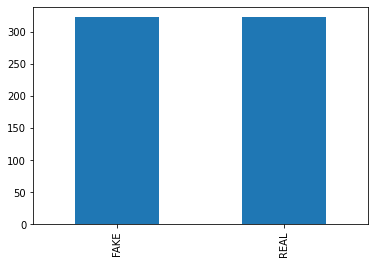

In [ ]:
dfTrain = pd.read_json('/content/gdrive/MyDrive/REALVideo/metadata.json').transpose()
dfTrain.head()
dfTrain.label.value_counts().plot.bar()
dfTrain.label.value_counts()
